In [98]:
import numpy as np
import pandas as pd
from tqdm import tqdm

np.random.seed(1337)
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

# Data

In [100]:
# load the training data from the respective filepaths
train_features_filepath = 'data/train_features_imputed.csv'
test_features_filepath = 'data/test_features.csv'
train_labels_filepath = 'data/train_labels.csv'

# create the dataframes
train_features_df = pd.read_csv(train_features_filepath, float_precision="round_trip")
test_features_df = pd.read_csv(test_features_filepath, float_precision="round_trip")
train_labels_df = pd.read_csv(train_labels_filepath, float_precision="round_trip")
print("Train shape:", train_features_df.shape, "| Train label shape:", train_labels_df.shape, "| Test shape:", test_features_df.shape)
display(train_features_df.head(40))
display(train_labels_df.head(40))
display(test_features_df.head(30))

display(train_features_df.describe())
display(train_labels_df.describe())

Train shape: (227940, 37) | Train label shape: (18995, 16) | Test shape: (151968, 37)


,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,3,34.0,35.36,35.748,12.00,3.2672,36.00,8.700,24.000,-2.000,16.00,252.470,3.462,6.3000,0.8446,45.000,153.24,0.5218,204.96,96.66,141.97,84.00,1.200,3.8000,61.00,6.3394,87.16,100.00,2.1798,114.00,24.600,94.00,1.192,1.9196,142.00,7.3300
1,1,4,34.0,34.86,31.784,17.16,2.4788,36.00,10.951,21.772,-2.000,16.00,243.960,3.224,10.6240,1.6714,38.624,356.58,0.5000,200.78,98.40,159.75,81.00,1.834,3.9930,62.50,6.8710,85.30,100.00,3.2316,106.97,33.076,99.00,2.714,9.3446,125.00,7.3300
2,1,5,34.0,36.59,32.648,15.90,2.5608,36.00,11.432,24.026,0.000,18.00,253.980,3.328,11.1500,1.3984,43.000,389.52,0.4000,231.30,97.74,144.20,74.00,1.936,4.0796,59.00,6.9688,91.30,100.00,2.5488,105.79,33.070,92.00,1.718,4.9482,110.00,7.3700
3,1,6,34.0,36.36,34.798,16.16,2.4116,37.00,11.062,22.662,0.000,18.00,268.750,3.324,10.1700,1.5116,39.360,206.28,0.4890,198.28,97.66,156.31,66.00,1.946,3.9380,49.50,7.5852,95.84,100.00,2.5204,106.89,32.573,88.00,1.558,1.2272,104.00,7.3700
4,1,7,34.0,35.65,36.699,17.86,2.4714,36.94,8.636,21.656,-1.771,18.00,241.710,3.484,10.6070,1.8674,38.790,185.38,0.4806,160.11,97.82,161.78,63.00,1.800,4.2170,48.00,6.7862,95.38,100.00,2.3244,107.35,22.400,81.00,2.662,0.9146,100.00,7.4100
5,1,8,34.0,35.67,36.037,18.20,2.6446,37.00,8.560,22.209,-1.978,16.00,267.710,3.489,10.0190,1.9580,39.280,212.16,0.4000,164.49,97.08,158.22,68.00,1.800,4.2220,51.00,6.2990,95.24,100.00,2.3014,107.50,22.400,82.00,2.446,2.6926,106.00,7.3606
6,1,9,34.0,34.63,34.115,20.34,2.6626,37.00,11.057,23.051,-3.275,18.00,270.280,3.880,9.6420,1.8836,37.290,347.64,0.5232,185.55,97.86,152.14,65.00,1.918,4.0500,46.00,7.5412,103.54,100.00,1.7232,105.80,33.310,67.00,4.156,0.7452,112.00,7.3688
7,1,10,34.0,34.94,34.332,18.98,2.6524,37.00,11.231,23.287,-3.075,18.00,266.940,3.706,10.2020,1.5614,38.270,349.28,0.5212,191.46,98.54,152.14,68.00,1.876,4.1880,47.00,7.6302,88.04,100.00,1.7510,106.28,33.898,62.00,2.854,0.7074,121.00,7.3710
8,1,11,34.0,33.77,40.777,12.00,2.2440,36.70,8.500,26.000,-1.487,12.00,266.760,4.600,4.7000,0.5000,37.808,308.32,0.5184,143.00,97.72,120.00,67.00,2.100,4.1000,47.00,7.6000,76.48,100.00,1.6722,111.00,23.800,58.00,2.850,0.8502,118.00,7.3872
9,1,12,34.0,33.85,35.915,12.00,2.7352,38.00,8.500,26.000,0.000,18.00,248.230,3.424,4.7000,0.9864,42.000,140.50,0.4000,170.73,97.24,147.03,62.00,2.100,4.1000,44.00,6.8548,93.40,100.00,1.8752,111.00,23.800,66.00,3.560,0.7010,110.00,7.3900


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.1,85.4,100.0,59.9
1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,100.6,95.5,85.5
2,100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.5,88.3,96.5,108.1
3,1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,19.4,77.2,98.3,80.9
4,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.6,76.8,97.7,95.3
5,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,67.4,99.1,64.6
6,10006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2,84.9,96.8,90.5
7,10007,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.8,97.0,94.3,76.0
8,10009,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.9,72.0,95.3,91.5
9,1001,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.9,83.3,99.9,117.3


,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,0,1,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,39.0,NaN,44.2,17.0,NaN,36.0,10.2,13.0,NaN,NaN,147.0,6.0,17.5,2.2,NaN,32.0,0.60,194.0,NaN,273.0,77.0,2.2,4.60,76.0,8.00,119.0,100.0,NaN,98.0,31.0,82.0,21.8,NaN,119.0,NaN
2,0,3,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,13.0,NaN,NaN,NaN,NaN,26.0,NaN,0.55,NaN,NaN,NaN,78.0,NaN,NaN,72.5,NaN,NaN,100.0,NaN,NaN,NaN,78.0,NaN,NaN,125.0,7.34
3,0,4,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,87.0,NaN,NaN,66.0,NaN,NaN,100.0,NaN,NaN,NaN,80.0,NaN,NaN,136.0,NaN
4,0,5,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,65.0,NaN,NaN,100.0,NaN,NaN,NaN,83.0,NaN,NaN,135.0,NaN
5,0,6,39.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,66.0,NaN,NaN,100.0,NaN,NaN,NaN,88.0,NaN,NaN,144.0,NaN
6,0,7,39.0,NaN,38.5,20.0,NaN,NaN,9.1,16.0,NaN,12.0,NaN,4.8,18.5,2.4,NaN,31.0,0.50,193.0,NaN,162.0,NaN,2.5,3.70,NaN,8.30,109.0,100.0,NaN,102.0,25.9,NaN,26.4,NaN,NaN,NaN
7,0,8,39.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,-4.0,12.0,NaN,NaN,NaN,NaN,30.0,NaN,0.50,NaN,NaN,NaN,80.0,NaN,NaN,59.0,NaN,NaN,100.0,NaN,NaN,NaN,90.0,NaN,NaN,129.0,7.40
8,0,9,39.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,56.5,NaN,NaN,100.0,NaN,NaN,NaN,90.0,NaN,NaN,121.0,NaN
9,0,10,39.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,55.0,NaN,NaN,100.0,NaN,NaN,NaN,85.0,NaN,NaN,120.0,NaN


,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
count,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000,227940.000000
mean,15788.831219,7.014399,62.073809,32.870337,44.255208,24.983223,2.792451,36.846798,10.576186,23.327849,-1.843590,18.119652,242.818734,3.689138,11.802187,1.656192,40.405947,173.096460,0.596390,197.438939,95.042436,146.910368,82.230118,1.993547,4.148679,63.553474,7.351299,98.943821,97.647463,1.423197,106.157668,31.112420,84.614934,1.549573,4.340169,122.460126,7.365366
std,9151.896286,4.716103,16.451854,2.832383,8.524518,8.221654,0.830449,0.550468,0.770540,1.322983,1.567669,4.618842,29.686586,0.412212,4.416877,0.618648,3.079974,156.480585,8.429145,33.309314,3.292455,27.697472,15.453554,0.138784,0.266635,12.599120,1.178867,26.442518,2.596861,0.639989,1.821255,2.299857,16.756396,0.737362,4.463229,21.638228,0.029926
min,1.000000,1.000000,15.000000,10.000000,12.500000,1.000000,0.200000,21.000000,3.300000,0.000000,-29.000000,1.000000,34.000000,0.200000,0.100000,0.100000,10.000000,5.000000,0.000000,2.000000,24.000000,15.000000,20.000000,0.500000,1.300000,20.000000,1.000000,12.000000,20.000000,0.010000,66.000000,9.400000,23.000000,0.100000,0.010000,21.000000,6.820000
25%,7879.000000,4.000000,52.000000,31.110000,39.754000,20.020000,2.259200,36.660000,10.261600,22.707000,-2.701000,15.480000,222.510000,3.486000,10.031000,1.390400,39.282000,81.040000,0.529200,183.600000,94.400000,138.580000,72.000000,1.938000,4.051600,55.000000,7.241000,86.880000,96.440000,0.935200,105.360000,30.226000,74.000000,1.108000,2.231800,108.000000,7.352400
50%,15726.000000,7.000000,64.000000,32.970000,43.474000,24.180000,2.660200,36.880000,10.544000,23.260000,-1.841000,18.000000,241.644000,3.686000,10.814000,1.665400,40.290000,139.820000,0.563800,194.900000,95.620000,145.630000,81.000000,1.994000,4.131000,62.090000,7.617400,95.980000,98.000000,1.361800,106.180000,31.141000,84.000000,1.460000,3.558400,120.860000,7.366200
75%,23725.000000,10.000000,74.000000,34.640000,48.544250,29.920000,3.196450,37.000000,10.887000,23.937000,-1.060000,20.000000,262.340000,3.888000,11.998000,1.884800,41.320000,226.640000,0.595000,207.870000,96.660000,154.400000,90.000000,2.040000,4.233400,70.000000,7.897050,107.020000,100.000000,1.850200,107.000000,31.950000,94.000000,1.844000,5.475650,134.000000,7.380400
max,31658.000000,315.000000,100.000000,100.000000,250.000000,268.000000,31.000000,42.000000,23.800000,50.000000,100.000000,97.000000,1179.000000,16.400000,440.000000,41.900000,100.000000,9961.000000,4000.000000,2322.000000,100.000000,952.000000,300.000000,9.600000,10.750000,298.000000,20.600000,3833.000000,100.000000,21.200000,141.000000,63.400000,191.000000,46.500000,440.000000,287.000000,7.780000


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
count,18995.000000,18995.000000,18995.000000,18995.000000,18995.00000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000
mean,15788.831219,0.268281,0.073704,0.239747,0.23622,0.240590,0.200211,0.099763,0.233693,0.033904,0.066017,0.057278,18.795960,82.511171,96.947311,84.119716
std,9152.117122,0.443076,0.261295,0.426940,0.42477,0.427453,0.400168,0.299692,0.423190,0.180986,0.248319,0.232380,3.511241,12.745110,2.110957,14.718396
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,26.000000,27.000000,30.200000
25%,7879.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.550000,73.200000,95.900000,73.700000
50%,15726.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,81.000000,97.100000,83.400000
75%,23724.500000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.600000,90.200000,98.300000,93.600000
max,31658.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.100000,147.100000,100.000000,155.600000


## Outliers removal

In [3]:
print(train_labels_df.shape, "| features:", train_features_df.shape)

outlier_columns = [col for col in train_features_df.columns if col not in ['pid', 'Time', 'Age']]

#df = train_features_df[outlier_columns]
#rows_to_keep = df[df.fillna(df.median()).apply(lambda x: np.abs(x - x.mean()) / x.std() < 7).all(axis=1)].index
#train_features_df = train_features_df.iloc[rows_to_keep]

print(train_labels_df.shape, "| features:", train_features_df.shape)

(18995, 16) | features: (227940, 37)
(18995, 16) | features: (227940, 37)


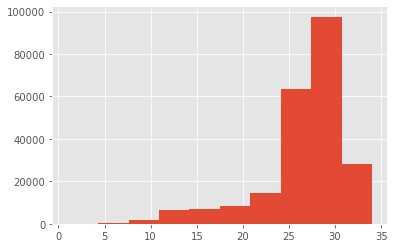

'Number of instances: 227940'

In [4]:
import matplotlib.pyplot as plt

# Plots the number of rows that have 'NaN' values
plt.style.use('ggplot')
plt.hist(train_features_df.isnull().sum(axis=1), bins=10)
plt.show()

display("Number of instances: {}".format(train_features_df.shape[0]))

# KNN Imputer

In [101]:
from sklearn.impute import KNNImputer
import multiprocessing

imputer = KNNImputer(n_neighbors=50)
imputer.fit(train_features_df.iloc[:, 2:])
    
def impute_df_knn(df, imputer, save_dest):
    print("[Impute] set has NaN values: {}".format(train_features_df.isnull().values.any()))
    print("[Impute] Starting KNN Imputation")
    
    df = train_features_df.iloc[:, 2:]
    nr_chunks = 1000
    for train_chunk in tqdm(np.array_split(df, nr_chunks)): 
        train_chunk_filled = imputer.transform(train_chunk)
        df.iloc[train_chunk.index] = train_chunk_filled

    train_features_df.iloc[:, 2:] = df

    imputed_train_filename = 'data/train_features_imputed2.csv'
    print("[Impute] Finished KNN Imputation, saving to '{}'.".format(save_dest))                                         
    print("[Impute] set has NaN values: {}".format(train_features_df.isnull().values.any()))
    train_features_df.to_csv(save_dest, index=False)
    display(train_features_df.head(600))

In [102]:
def impute_test_df(imputer):
    print("[Test Impute] Test set has NaN values: {}".format(test_features_df.isnull().values.any()))
    print("[Test Impute] Starting KNN Test Imputation")
    
    df = test_features_df.iloc[:, 2:]
    nr_chunks = 1000
    for test_chunk in tqdm(np.array_split(df, nr_chunks)): 
        test_chunk_filled = imputer.transform(test_chunk)
        df.iloc[test_chunk.index] = test_chunk_filled

    test_features_df.iloc[:, 2:] = df

    imputed_test_filename = 'data/test_features_imputed.csv'
    print("[Test Impute] Finished KNN Imputation, saving to '{}'.".format(imputed_test_filename))                                         
    print("[Test Impute] set has NaN values: {}".format(test_features_df.isnull().values.any()))
    test_features_df.to_csv(imputed_test_filename, index=False)
    display(test_features_df.head(600))

In [ ]:
impute_test_df(imputer)

[Test Impute] Test set has NaN values: True
[Test Impute] Starting KNN Test Imputation


  2%|▎         | 25/1000 [15:55<10:27:04, 38.59s/it]

## Grouping

* groupby the `'pid'` column values for each age range from `[0, 20, 30, 40, 50, 60, 70, 80, 110]`
* ignore `'Time'` col

In [5]:
def group_columns_in_df(df):
    age_ranges = [0, 20, 30, 40, 50, 60, 70, 80, 110]
    dfs = []
    for i in range(len(age_ranges) - 1):
        age_l = age_ranges[i]
        age_u = age_ranges[i+1]
        sub_df = df[(df['Age'] >= age_l) & (df['Age'] < age_u)]
        sub_df = sub_df.loc[:, sub_df.columns != 'Time'].groupby('pid', as_index=False, sort=False).agg(np.median)
        sub_df = sub_df.fillna(sub_df.median())
        dfs.append(sub_df)
    grouped_df = df.loc[:, df.columns != 'Time'].groupby('pid', as_index=False, sort=False).agg(np.nanmean)
    result = grouped_df.copy()
    result.update(result[['pid']].merge(pd.concat(dfs)))
    result = result.astype({"pid": int})
    assert(grouped_df.shape == result.shape)
    assert(not grouped_df.equals(result))
    return result

X_df = group_columns_in_df(train_features_df)
display(X_df.shape)
display(X_df.head(20))

X_test_df = group_columns_in_df(test_features_df)

(18995, 36)

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,34.0,35.285,35.2730,17.330,2.6027,36.92,9.8255,23.1450,-1.8080,18.00,259.270,3.4865,10.0945,1.6164,39.0350,260.240,0.4923,188.505,97.78,153.740,67.50,1.897,4.0898,48.5000,6.9335,92.350,100.00,2.1445,106.930,28.5865,75.00,2.6880,0.8824,111.00,7.3705
1,10,71.0,31.260,55.6370,31.910,3.1147,36.72,10.4120,22.9900,-0.6380,16.89,207.780,3.7620,8.6172,2.0714,40.8530,66.600,0.5867,197.880,96.06,153.010,100.50,2.040,4.0640,81.0000,7.5749,90.065,98.00,0.6637,105.770,30.2490,81.00,1.2760,4.3158,136.00,7.3824
2,100,68.0,32.135,48.5290,32.240,3.0575,36.86,10.3310,23.1815,-1.7075,15.00,231.770,3.6290,9.9546,2.0982,41.7970,105.075,0.6082,194.410,95.97,160.900,80.00,2.028,4.0627,63.0000,7.8594,91.580,97.00,1.6078,105.130,30.4190,113.00,1.7000,2.6882,113.00,7.3566
3,1000,79.0,30.230,50.8950,29.360,3.0754,37.00,9.9845,23.5010,-2.1020,12.00,200.769,3.9140,11.5090,1.8498,40.2840,93.180,0.6006,185.680,95.32,141.625,82.53,2.028,4.0582,63.0000,7.6459,85.310,100.00,0.8742,106.740,29.3110,79.00,0.9100,1.9149,130.00,7.3601
4,10000,76.0,31.925,50.8450,30.040,2.8819,36.92,10.5300,23.8375,-2.8190,12.00,213.777,3.9500,11.6326,1.6530,40.7800,91.830,0.5548,179.710,94.10,145.615,68.97,1.958,4.0218,50.2500,7.3662,95.560,98.00,0.9814,106.105,31.1420,76.00,1.1520,2.6543,123.50,7.3448
5,10002,73.0,32.015,55.1400,28.230,2.4885,37.00,10.5201,23.9715,-1.7330,17.62,217.890,3.7660,10.1988,1.7990,39.9920,90.350,0.6009,178.140,95.86,140.040,71.00,1.962,4.2178,49.2500,6.8689,87.390,100.00,0.8735,105.930,30.5150,69.00,1.1230,2.8475,128.54,7.3705
6,10006,51.0,36.920,42.4530,22.310,3.0933,37.05,10.8650,23.0255,-1.7970,21.00,269.200,3.4440,11.0445,1.4483,41.2100,166.730,0.5292,192.710,96.48,146.050,74.50,1.958,4.1608,53.4667,7.6574,107.840,97.95,2.0486,106.880,31.7210,84.50,2.5170,2.6614,113.70,7.3686
7,10007,60.0,32.215,43.3680,27.620,3.2207,36.76,10.6910,22.1960,-2.2245,22.00,240.140,4.1090,9.4500,1.6092,38.8250,217.940,0.5679,193.600,97.40,139.435,111.50,2.002,4.3235,89.5000,7.7954,101.560,94.50,1.0968,106.320,31.5865,89.50,1.4550,4.5308,142.00,7.3577
8,10009,69.0,32.285,54.1440,31.720,3.4980,36.89,10.3965,22.4900,-2.5250,22.50,228.850,3.6310,9.7156,2.2316,40.3000,51.080,0.6000,202.140,96.32,174.220,67.00,2.026,4.0674,66.5000,7.6662,92.750,97.50,1.3706,105.590,30.9534,97.00,1.5405,3.8502,90.50,7.3534
9,1001,36.0,35.770,35.7460,19.180,2.3331,37.04,10.7915,23.9620,6.0000,13.00,290.330,3.4020,10.3105,1.8149,39.3490,290.540,0.4633,213.520,96.63,152.190,86.50,1.836,4.1405,69.5000,6.8519,95.425,100.00,2.8847,106.750,31.3100,106.50,1.9060,2.9934,114.50,7.4626


## Adding features

In [6]:
def max_abs_diff_agg_fn(x):
    if x.isna().all():
        return 0
    else:
        min_val = np.nanmin(x)
        max_val = np.nanmax(x)
        res = np.abs(max_val - min_val)
        return res

def std_dev_agg_fn(x):
    if x.isna().all():
        return 0
    else:
        return np.nanstd(x)
    
def min_agg_fn(x):
    if x.isna().all():
        return np.nan
    else:
        return np.nanmin(x)
    
def max_agg_fn(x):
    if x.isna().all():
        return np.nan
    else:
        return np.nanmax(x)


def add_features(df_to_group, df_to_add_features_to):
    """Add maximum absolute difference features for each column to a dataframe
    
    Args:
        df_to_group (pd.DataFrame): the dataframe that will be grouped by 'pid'
        df_to_add_features_to (pd.DataFrame): the dataframe to add new features to
        
    Returns:
        pd.DataFrame: the new dataframe with all features
    """
    grouped_df = df_to_group.drop(['Age', 'Time'], axis=1).groupby('pid', as_index=False, sort=False)
    ## Maximum Absolute Difference
    mad_features_df = grouped_df.agg(max_abs_diff_agg_fn)
    #mad_features_df = grouped_df.agg(np.nanmean)
    mad_features_df.columns = [str(col) + '_diff' for col in mad_features_df.columns]
    # Remove 'pid' col from features_df
    mad_features_df = mad_features_df.iloc[:, 1:]
    
    ## Std dev.
    std_features_df = grouped_df.agg(std_dev_agg_fn)
    #std_features_df = grouped_df.agg(np.nanmean)
    std_features_df.columns = [str(col) + '_std' for col in std_features_df.columns]
    # Remove 'pid' col from features_df
    std_features_df = std_features_df.iloc[:, 1:]
    
    ## Min
    min_features_df = grouped_df.agg(min_agg_fn)
    #min_features_df = grouped_df.agg(np.nanmean)
    min_features_df.columns = [str(col) + '_min' for col in min_features_df.columns]
    # Remove 'pid' col from features_df
    min_features_df = min_features_df.iloc[:, 1:]
    
    ## Max
    max_features_df = grouped_df.agg(max_agg_fn)
    #max_features_df = grouped_df.agg(np.nanmean)
    max_features_df.columns = [str(col) + '_max' for col in max_features_df.columns]
    # Remove 'pid' col from features_df
    max_features_df = max_features_df.iloc[:, 1:]
    
    ## Fever
    df_to_add_features_to['Fever'] = df_to_add_features_to.apply(lambda row: 1 if row['Temp'] >= 37.5 else 0, axis=1)
    
    ## Result
    return pd.concat([
        df_to_add_features_to, 
        mad_features_df, 
        min_features_df,
        max_features_df, 
        std_features_df
    ], axis=1, sort=False)

X_df = add_features(train_features_df, X_df)

display(X_df.shape)
display(X_df.describe())
display(X_df.head(30))

X_test_df = add_features(test_features_df, X_test_df)

X_df_backup = X_df.copy()
X_test_df_backup = X_test_df.copy()

(18995, 173)

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
count,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.00000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.00000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,1.899500e+04,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,1.899500e+04,18995.000000,1.899500e+04,18995.000000,1.899500e+04,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,1.899500e+04,1.899500e+04,1.899500e+04

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
0,1,34.0,35.285,35.2730,17.330,2.6027,36.92,9.8255,23.1450,-1.8080,18.00,259.270,3.4865,10.0945,1.6164,39.0350,260.240,0.4923,188.505,97.78,153.740,67.50,1.897,4.0898,48.5000,6.9335,92.350,100.00,2.1445,106.930,28.5865,75.00,2.6880,0.8824,111.00,7.3705,0,2.82,8.993,8.34,1.0232,2.00,2.9540,4.344,3.275,6.00,36.480,1.376,6.4500,1.6794,7.710,249.02,0.1232,88.30,1.88,43.10,31.00,0.900,0.4680,23.5000,1.3312,48.58,0.00,1.5594,8.85,11.6980,41.00,2.964,8.8230,42.00,0.0800,33.77,31.784,12.00,2.2440,36.00,8.5000,21.656,-3.275,12.00,233.800,3.224,4.7000,0.5000,37.290,140.50,0.4000,143.00,96.66,120.00,53.00,1.200,3.8000,39.00,6.2990,76.48,100.00,1.6722,105.15,22.2000,58.00,1.192,0.5216,100.00,7.3300,36.59,40.777,20.34,3.2672,38.00,11.454,26.000,0.000,18.00,270.280,4.600,11.1500,2.1794,45.000,389.52,0.5232,231.30,98.54,163.10,84.00,2.100,4.2680,62.5000,7.6302,125.06,100.00,3.2316,114.00,33.898,99.00,4.156,9.3446,142.00,7.4100,0.838283,2.193752,2.841988,0.257435,0.544304,1.320414,1.370701,1.137446,1.732051,11.996526,0.398827,2.242045,0.477803,2.243836,89.338264,0.047200,23.262240,0.508426,11.348575,7.961714,0.222131,0.127943,6.799203,0.454585,11.401490,0.000000,0.422778,2.598438,4.995788,13.325779,0.801408,2.496202,11.572237,0.022364
1,10,71.0,31.260,55.6370,31.910,3.1147,36.72,10.4120,22.9900,-0.6380,16.89,207.780,3.7620,8.6172,2.0714,40.8530,66.600,0.5867,197.880,96.06,153.010,100.50,2.040,4.0640,81.0000,7.5749,90.065,98.00,0.6637,105.770,30.2490,81.00,1.2760,4.3158,136.00,7.3824,0,2.97,30.564,22.38,0.7638,0.88,4.2310,2.146,0.845,8.00,74.670,1.448,3.9818,1.6014,1.812,89.74,0.0742,17.24,4.20,29.47,46.04,0.582,1.0336,35.0000,1.3038,31.39,3.00,0.8680,2.65,12.4180,21.08,0.466,7.7986,39.00,0.0244,29.71,27.800,12.00,2.3824,36.00,10.3690,22.626,-1.279,15.00,203.060,2.500,8.3102,0.8200,40.080,20.00,0.5368,192.10,91.92,134.31,73.96,1.500,3.2000,64.00,7.2962,68.00,96.00,0.2994,104.97,29.6820,69.00,1.136,0.0100,113.00,7.3592,32.68,58.364,34.38,3.1462,36.88,14.600,24.772,-0.434,23.00,277.730,3.948,12.2920,2.4214,41.892,109.74,0.6110,209.34,96.12,163.78,120.00,2.082,4.2336,99.0000,8.6000,99.39,99.00,1.1674,107.

In [7]:
X_df = X_df_backup.copy()
X_test_df = X_test_df_backup.copy()

## Data imputation

In [8]:
def median_impute_df(df):
    return df.fillna(df.median())

def impute_min_max_df(df):
    filled_cols = [col for col in X_df if (all([not col.endswith(suffix) for suffix in ['_min', '_max', '_diff', '_std']])) and col != 'pid' and col != 'Age']
    df_filled = df[filled_cols].copy()
    
    min_cols = [col for col in X_df if col.endswith('_min')]
    df_filled.columns = min_cols
    df[min_cols] = df[min_cols].fillna(df_filled)
    
    max_cols = [col for col in X_df if col.endswith('_max')]
    df_filled.columns = max_cols
    df[max_cols] = df[max_cols].fillna(df_filled)
    return df

def impute_df(df):
    summarized_cols = ['_min', '_max', '_diff', '_std', '_25%', '_75%']
    filled_cols = [col for col in X_df if (all([not col.endswith(suffix) for suffix in summarized_cols])) and col != 'pid' and col != 'Age' and col != 'Fever']
    df_filled = df[filled_cols].copy()

    assert(df[filled_cols].equals(df_filled.fillna(df_filled.median())))
    min_cols = [col for col in df if col.endswith('_min')]
    df_filled.columns = min_cols
    df[min_cols] = df[min_cols].fillna(df_filled)

    max_cols = [col for col in df if col.endswith('_max')]
    df_filled.columns = max_cols
    df[max_cols] = df[max_cols].fillna(df_filled)
    return df


"""median_cols = [col for col in X_df if not col.endswith('_max') and not col.endswith('_min')]
display(X_df.head(20))
X_df[median_cols] = median_impute_df(X_df[median_cols].copy())
display(X_df.head(30))
X_df = impute_min_max_df(X_df)
display(X_df.head(30))"""

display("------Train------")
display(X_df.head(20))
X_df = impute_df(X_df)
display(X_df.head(20))
display("------Test------")
X_test_df = impute_df(X_test_df)

"""median_cols = [col for col in X_test_df if not col.endswith('_max') and not col.endswith('_min')]
X_test_df[median_cols] = median_impute_df(X_test_df[median_cols].copy())
X_test_df = impute_min_max_df(X_test_df)"""

'------Train------'

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
0,1,34.0,35.285,35.2730,17.330,2.6027,36.92,9.8255,23.1450,-1.8080,18.00,259.270,3.4865,10.0945,1.6164,39.0350,260.240,0.4923,188.505,97.78,153.740,67.50,1.897,4.0898,48.5000,6.9335,92.350,100.00,2.1445,106.930,28.5865,75.00,2.6880,0.8824,111.00,7.3705,0,2.82,8.993,8.34,1.0232,2.00,2.9540,4.344,3.275,6.00,36.480,1.376,6.4500,1.6794,7.710,249.02,0.1232,88.30,1.88,43.10,31.00,0.900,0.4680,23.5000,1.3312,48.58,0.00,1.5594,8.85,11.6980,41.00,2.964,8.8230,42.00,0.0800,33.77,31.784,12.00,2.2440,36.00,8.5000,21.656,-3.275,12.00,233.800,3.224,4.7000,0.5000,37.290,140.50,0.4000,143.00,96.66,120.00,53.00,1.200,3.8000,39.00,6.2990,76.48,100.00,1.6722,105.15,22.2000,58.00,1.192,0.5216,100.00,7.3300,36.59,40.777,20.34,3.2672,38.00,11.454,26.000,0.000,18.00,270.280,4.600,11.1500,2.1794,45.000,389.52,0.5232,231.30,98.54,163.10,84.00,2.100,4.2680,62.5000,7.6302,125.06,100.00,3.2316,114.00,33.898,99.00,4.156,9.3446,142.00,7.4100,0.838283,2.193752,2.841988,0.257435,0.544304,1.320414,1.370701,1.137446,1.732051,11.996526,0.398827,2.242045,0.477803,2.243836,89.338264,0.047200,23.262240,0.508426,11.348575,7.961714,0.222131,0.127943,6.799203,0.454585,11.401490,0.000000,0.422778,2.598438,4.995788,13.325779,0.801408,2.496202,11.572237,0.022364
1,10,71.0,31.260,55.6370,31.910,3.1147,36.72,10.4120,22.9900,-0.6380,16.89,207.780,3.7620,8.6172,2.0714,40.8530,66.600,0.5867,197.880,96.06,153.010,100.50,2.040,4.0640,81.0000,7.5749,90.065,98.00,0.6637,105.770,30.2490,81.00,1.2760,4.3158,136.00,7.3824,0,2.97,30.564,22.38,0.7638,0.88,4.2310,2.146,0.845,8.00,74.670,1.448,3.9818,1.6014,1.812,89.74,0.0742,17.24,4.20,29.47,46.04,0.582,1.0336,35.0000,1.3038,31.39,3.00,0.8680,2.65,12.4180,21.08,0.466,7.7986,39.00,0.0244,29.71,27.800,12.00,2.3824,36.00,10.3690,22.626,-1.279,15.00,203.060,2.500,8.3102,0.8200,40.080,20.00,0.5368,192.10,91.92,134.31,73.96,1.500,3.2000,64.00,7.2962,68.00,96.00,0.2994,104.97,29.6820,69.00,1.136,0.0100,113.00,7.3592,32.68,58.364,34.38,3.1462,36.88,14.600,24.772,-0.434,23.00,277.730,3.948,12.2920,2.4214,41.892,109.74,0.6110,209.34,96.12,163.78,120.00,2.082,4.2336,99.0000,8.6000,99.39,99.00,1.1674,107.

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
0,1,34.0,35.285,35.2730,17.330,2.6027,36.92,9.8255,23.1450,-1.8080,18.00,259.270,3.4865,10.0945,1.6164,39.0350,260.240,0.4923,188.505,97.78,153.740,67.50,1.897,4.0898,48.5000,6.9335,92.350,100.00,2.1445,106.930,28.5865,75.00,2.6880,0.8824,111.00,7.3705,0,2.82,8.993,8.34,1.0232,2.00,2.9540,4.344,3.275,6.00,36.480,1.376,6.4500,1.6794,7.710,249.02,0.1232,88.30,1.88,43.10,31.00,0.900,0.4680,23.5000,1.3312,48.58,0.00,1.5594,8.85,11.6980,41.00,2.964,8.8230,42.00,0.0800,33.77,31.784,12.00,2.2440,36.00,8.5000,21.656,-3.275,12.00,233.800,3.224,4.7000,0.5000,37.290,140.50,0.4000,143.00,96.66,120.00,53.00,1.200,3.8000,39.00,6.2990,76.48,100.00,1.6722,105.15,22.2000,58.00,1.192,0.5216,100.00,7.3300,36.59,40.777,20.34,3.2672,38.00,11.454,26.000,0.000,18.00,270.280,4.600,11.1500,2.1794,45.000,389.52,0.5232,231.30,98.54,163.10,84.00,2.100,4.2680,62.5000,7.6302,125.06,100.00,3.2316,114.00,33.898,99.00,4.156,9.3446,142.00,7.4100,0.838283,2.193752,2.841988,0.257435,0.544304,1.320414,1.370701,1.137446,1.732051,11.996526,0.398827,2.242045,0.477803,2.243836,89.338264,0.047200,23.262240,0.508426,11.348575,7.961714,0.222131,0.127943,6.799203,0.454585,11.401490,0.000000,0.422778,2.598438,4.995788,13.325779,0.801408,2.496202,11.572237,0.022364
1,10,71.0,31.260,55.6370,31.910,3.1147,36.72,10.4120,22.9900,-0.6380,16.89,207.780,3.7620,8.6172,2.0714,40.8530,66.600,0.5867,197.880,96.06,153.010,100.50,2.040,4.0640,81.0000,7.5749,90.065,98.00,0.6637,105.770,30.2490,81.00,1.2760,4.3158,136.00,7.3824,0,2.97,30.564,22.38,0.7638,0.88,4.2310,2.146,0.845,8.00,74.670,1.448,3.9818,1.6014,1.812,89.74,0.0742,17.24,4.20,29.47,46.04,0.582,1.0336,35.0000,1.3038,31.39,3.00,0.8680,2.65,12.4180,21.08,0.466,7.7986,39.00,0.0244,29.71,27.800,12.00,2.3824,36.00,10.3690,22.626,-1.279,15.00,203.060,2.500,8.3102,0.8200,40.080,20.00,0.5368,192.10,91.92,134.31,73.96,1.500,3.2000,64.00,7.2962,68.00,96.00,0.2994,104.97,29.6820,69.00,1.136,0.0100,113.00,7.3592,32.68,58.364,34.38,3.1462,36.88,14.600,24.772,-0.434,23.00,277.730,3.948,12.2920,2.4214,41.892,109.74,0.6110,209.34,96.12,163.78,120.00,2.082,4.2336,99.0000,8.6000,99.39,99.00,1.1674,107.

'------Test------'

"median_cols = [col for col in X_test_df if not col.endswith('_max') and not col.endswith('_min')]\nX_test_df[median_cols] = median_impute_df(X_test_df[median_cols].copy())\nX_test_df = impute_min_max_df(X_test_df)"

## Scaling / normalization

In [9]:
from sklearn import preprocessing

# Scale the dataframe
def scale_df(df, scaler=None):
    if scaler is None:
        scaler = preprocessing.MinMaxScaler()
        df.loc[:, df.columns != 'pid'] = scaler.fit_transform(df.loc[:, df.columns != 'pid'])
        return scaler
    else:
        df.loc[:, df.columns != 'pid'] = scaler.transform(df.loc[:, df.columns != 'pid'])
        return scaler

scaler = scale_df(X_df)
display(X_df.describe())
_ = display(X_df.head(30), scaler)

scale_df(X_test_df)

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
count,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.0000

,pid,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,Phosphate,WBC,Creatinine,PaCO2,AST,FiO2,Platelets,SaO2,Glucose,ABPm,Magnesium,Potassium,ABPd,Calcium,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH,Fever,EtCO2_diff,PTT_diff,BUN_diff,Lactate_diff,Temp_diff,Hgb_diff,HCO3_diff,BaseExcess_diff,RRate_diff,Fibrinogen_diff,Phosphate_diff,WBC_diff,Creatinine_diff,PaCO2_diff,AST_diff,FiO2_diff,Platelets_diff,SaO2_diff,Glucose_diff,ABPm_diff,Magnesium_diff,Potassium_diff,ABPd_diff,Calcium_diff,Alkalinephos_diff,SpO2_diff,Bilirubin_direct_diff,Chloride_diff,Hct_diff,Heartrate_diff,Bilirubin_total_diff,TroponinI_diff,ABPs_diff,pH_diff,EtCO2_min,PTT_min,BUN_min,Lactate_min,Temp_min,Hgb_min,HCO3_min,BaseExcess_min,RRate_min,Fibrinogen_min,Phosphate_min,WBC_min,Creatinine_min,PaCO2_min,AST_min,FiO2_min,Platelets_min,SaO2_min,Glucose_min,ABPm_min,Magnesium_min,Potassium_min,ABPd_min,Calcium_min,Alkalinephos_min,SpO2_min,Bilirubin_direct_min,Chloride_min,Hct_min,Heartrate_min,Bilirubin_total_min,TroponinI_min,ABPs_min,pH_min,EtCO2_max,PTT_max,BUN_max,Lactate_max,Temp_max,Hgb_max,HCO3_max,BaseExcess_max,RRate_max,Fibrinogen_max,Phosphate_max,WBC_max,Creatinine_max,PaCO2_max,AST_max,FiO2_max,Platelets_max,SaO2_max,Glucose_max,ABPm_max,Magnesium_max,Potassium_max,ABPd_max,Calcium_max,Alkalinephos_max,SpO2_max,Bilirubin_direct_max,Chloride_max,Hct_max,Heartrate_max,Bilirubin_total_max,TroponinI_max,ABPs_max,pH_max,EtCO2_std,PTT_std,BUN_std,Lactate_std,Temp_std,Hgb_std,HCO3_std,BaseExcess_std,RRate_std,Fibrinogen_std,Phosphate_std,WBC_std,Creatinine_std,PaCO2_std,AST_std,FiO2_std,Platelets_std,SaO2_std,Glucose_std,ABPm_std,Magnesium_std,Potassium_std,ABPd_std,Calcium_std,Alkalinephos_std,SpO2_std,Bilirubin_direct_std,Chloride_std,Hct_std,Heartrate_std,Bilirubin_total_std,TroponinI_std,ABPs_std,pH_std
0,1,0.223529,0.347537,0.180325,0.067273,0.101318,0.435556,0.247986,0.743231,0.467366,0.376471,0.536933,0.287763,0.376480,0.084385,0.338571,0.289446,0.294861,0.395913,0.890099,0.192801,0.266423,0.156040,0.348495,0.152482,0.775401,0.215294,1.000000,0.650428,0.625608,0.408415,0.356364,0.609756,0.036852,0.399417,0.651938,0.0,0.040816,0.039426,0.032670,0.035652,0.124224,0.217782,0.149793,0.030324,0.074832,0.038557,0.107888,0.015022,0.041123,0.116818,0.025238,0.000031,0.041575,0.026479,0.051679,0.133621,0.101124,0.068612,0.095142,0.071686,0.013283,0.000000,0.080379,0.228919,0.355271,0.325397,0.066040,0.020123,0.237288,0.133333,0.750553,0.439411,0.302863,0.307702,0.882353,0.637208,0.867837,0.887069,0.314286,0.727763,0.779381,0.183882,0.199025,0.820456,0.314575,0.4000,0.583030,0.987228,0.658596,0.366667,0.444727,0.791991,0.254181,0.724184,0.394228,1.00000,0.631919,0.929046,0.529933,0.307018,0.421622,0.047809,0.537415,0.864407,0.143108,0.034130,0.034765,0.045139,0.333333,0.108077,0.175824,0.122807,0.141304,0.064656,0.113049,0.005694,0.028104,0.126596,0.034660,0.000006,0.025351,0.862264,0.047222,0.13600,0.029503,0.046484,0.094231,0.104271,0.011495,1.000000,0.137006,0.273412,0.155227,0.361111,0.073030,0.019966,0.337900,0.439394,0.034457,0.028453,0.035808,0.025369,0.125243,0.357011,0.139967,0.040264,0.060324,0.044707,0.115680,0.014120,0.042642,0.097001,0.026685,0.000043,0.040260,0.021937,0.038140,0.114125,0.092503,0.061821,0.100944,0.092171,0.008457,0.000000,0.063193,0.152024,0.457491,0.314495,0.065885,0.018762,0.218178,0.115507
1,10,0.658824,0.287463,0.853248,0.191274,0.134728,0.413333,0.344402,0.735365,0.499641,0.350353,0.236033,0.399031,0.317278,0.129261,0.385792,0.033984,0.425972,0.454591,0.804950,0.190825,0.507299,0.395973,0.338667,0.382979,0.862524,0.202540,0.916667,0.135510,0.595903,0.517289,0.400000,0.168230,0.195187,0.545190,0.670388,0.0,0.042987,0.133994,0.087668,0.026613,0.054658,0.311929,0.074000,0.007824,0.099776,0.078922,0.113533,0.009274,0.039213,0.027455,0.009095,0.000019,0.008117,0.059155,0.035336,0.198448,0.065393,0.151532,0.141700,0.070210,0.008583,0.038462,0.044741,0.068546,0.3

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

# SVM Training

In [45]:
#X_df = X_df.iloc[0:2000, :]
#train_labels_df = train_labels_df.iloc[0:2000, :]
print("Train features have {} rows. Train labels have {} rows.".format(X_df.shape[0], train_labels_df.shape[0]))
train_labels_df = train_labels_df.loc[train_labels_df['pid'].isin(X_df['pid'])]
train_labels_df.reset_index(drop=True, inplace=True)
print("Train features have {} rows. Train labels have {} rows.".format(X_df.shape[0], train_labels_df.shape[0]))

# Prepare train set
# Assert that the pids are matching in train features / train labels dfs
assert(X_df.iloc[:, 0].astype(int).equals(train_labels_df.iloc[:, 0].astype(int)))

X = X_df.iloc[:, 1:].to_numpy()
y = train_labels_df.iloc[:, 1:].to_numpy()

assert(X.shape[0] == y.shape[0])

Train features have 18995 rows. Train labels have 18995 rows.
Train features have 18995 rows. Train labels have 18995 rows.


In [46]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(RandomForestRegressor(verbose=True, n_estimators=200), n_jobs=-1)

model.fit(X, y)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=200,
                                              

# Predictions

In [47]:
def predict(df):
    # Create X_predict by removing 'pid' column
    X_predict = df.iloc[:, 1:].to_numpy()
    
    # Predict
    predictions = model.predict(X_predict)
    predictions[:, :-4] = np.divide(1, 1+np.exp(-predictions[:, :-4]))
    
    # Create predictions df
    predict_labels_df = pd.DataFrame(columns=train_labels_df.columns)
    predict_labels_df[['pid']] = df[['pid']]
    predict_labels_df.loc[:, predict_labels_df.columns != 'pid'] = predictions
    
    return predict_labels_df

## Train set

In [48]:
prediction_labels_df = predict(X_df)

print(prediction_labels_df.shape)
display(prediction_labels_df.head(15))
display(train_labels_df.head(15))

(18995, 16)


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,0.704746,0.511248,0.512497,0.514996,0.524979,0.683521,0.500000,0.523732,0.501250,0.500000,0.511248,13.957000,80.1695,99.5215,68.248500
1,10,0.503750,0.502500,0.517493,0.507499,0.516244,0.514996,0.524979,0.503750,0.500000,0.505000,0.500000,17.954000,98.7245,96.0730,83.228500
2,100,0.679179,0.501250,0.519989,0.533699,0.526226,0.670401,0.500000,0.517493,0.501250,0.500000,0.507499,16.476500,85.7655,96.4890,107.564500
3,1000,0.517493,0.505000,0.511248,0.505000,0.514996,0.687831,0.521237,0.700567,0.502500,0.707857,0.502500,18.348000,79.2560,98.0255,82.363500
4,10000,0.587830,0.500000,0.503750,0.506250,0.505000,0.526226,0.500000,0.549834,0.500000,0.500000,0.507499,14.306500,75.3645,97.6980,87.694000
5,10002,0.505000,0.521237,0.524979,0.522485,0.519989,0.539915,0.522485,0.524979,0.502500,0.542398,0.514996,16.357667,70.1230,98.4365,68.482500
6,10006,0.501250,0.500000,0.529964,0.522485,0.518741,0.506250,0.506250,0.508749,0.505000,0.501250,0.501250,18.374500,81.6190,96.8080,88.047000
7,10007,0.501250,0.501250,0.688904,0.675902,0.675902,0.506250,0.544879,0.505000,0.501250,0.503750,0.653622,22.540000,100.8130,94.6455,75.645500
8,10009,0.671505,0.669295,0.526226,0.527472,0.524979,0.682438,0.508749,0.671505,0.500000,0.500000,0.512497,20.313000,72.5755,95.8255,92.394500
9,1001,0.706822,0.511248,0.523732,0.532454,0.528718,0.691043,0.500000,0.547358,0.505000,0.500000,0.514996,15.990000,84.2630,99.2355,111.491273


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.1,85.4,100.0,59.9
1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,100.6,95.5,85.5
2,100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.5,88.3,96.5,108.1
3,1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,19.4,77.2,98.3,80.9
4,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.6,76.8,97.7,95.3
5,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,67.4,99.1,64.6
6,10006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2,84.9,96.8,90.5
7,10007,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.8,97.0,94.3,76.0
8,10009,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.9,72.0,95.3,91.5
9,1001,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.9,83.3,99.9,117.3


In [49]:
prediction_labels_df.to_csv('data/prediction_train.csv', index=False, float_format='%.3f')

In [50]:
train_labels_df.to_csv('data/prediction_gold.csv', index=False, float_format='%.3f')

In [51]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

# start @ 2:15

Current Time = 03:48:04


## Test set

In [52]:
prediction_test_labels_df = predict(X_test_df)

print(prediction_test_labels_df.shape)
display(prediction_test_labels_df.head(15))

(12664, 16)


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,0,0.632975,0.629483,0.579324,0.587830,0.599888,0.631812,0.632975,0.620106,0.627148,0.623634,0.650219,18.883000,91.406667,92.987500,87.960500
1,10001,0.637609,0.642217,0.634136,0.618928,0.622459,0.622459,0.639916,0.649081,0.642217,0.642217,0.646799,17.232500,96.236500,90.971548,94.368000
2,10003,0.642217,0.644512,0.644512,0.628316,0.635295,0.617748,0.649081,0.628316,0.649081,0.672607,0.641067,19.736500,94.793500,94.698000,88.144612
3,10004,0.631812,0.641067,0.630649,0.620106,0.623634,0.629483,0.652489,0.653622,0.647941,0.634136,0.647941,19.052500,90.950086,91.417595,88.164112
4,10005,0.628316,0.641067,0.638763,0.629483,0.628316,0.634136,0.632975,0.641067,0.649081,0.642217,0.654753,21.156000,88.616586,91.692095,60.831500
5,10008,0.627148,0.627148,0.625978,0.628316,0.632975,0.617748,0.637609,0.650219,0.657010,0.644512,0.652489,19.229500,100.017000,94.879500,79.676000
6,10011,0.623634,0.643365,0.636453,0.620106,0.634136,0.622459,0.652489,0.653622,0.645656,0.636453,0.637609,19.075000,101.940500,91.040000,72.995000
7,10017,0.636453,0.637609,0.625978,0.621284,0.616567,0.621284,0.651355,0.651355,0.642217,0.635295,0.634136,22.325786,112.836000,95.431651,96.621612
8,10018,0.636453,0.636453,0.624806,0.622459,0.624806,0.622459,0.634136,0.650219,0.644512,0.622459,0.645656,19.740000,96.627000,91.923167,93.283000
9,10019,0.617748,0.637609,0.637609,0.620106,0.624806,0.643365,0.638763,0.586618,0.643365,0.638763,0.653622,20.447500,87.465500,94.913833,76.696500


In [53]:
prediction_test_labels_df.to_csv('data/prediction.csv', index=False, float_format='%.3f')

# Feature selection

In [66]:
from sklearn.feature_selection import SelectKBest, chi2

# k = 50, good
print("Original shape: ", X.shape)
label_feature_masks = dict()
for index, y_i in enumerate(y.T[:-4]):
    selector_model = SelectKBest(chi2, k=60)
    X_new = selector_model.fit_transform(X, y_i)
    label_feature_masks[train_labels_df.iloc[:, 1:].columns[index]] = selector_model.get_support()
    print("For {}: {} {}".format(train_labels_df.iloc[:, 1:].columns[index], X_new.shape, selector_model.get_support()))

Original shape:  (18995, 172)
For LABEL_BaseExcess: (18995, 60) [False False False False False False False False False False  True False
 False False False False False False False False  True False False  True
 False False False False False False False False False  True False  True
  True  True False  True  True False  True  True False False  True False
 False  True False False False  True False False  True  True False  True
 False False False  True  True False False False False  True False  True
 False  True False False False False False False False False  True  True
 False  True  True  True False  True False False  True  True False False
  True False False False False  True  True False False  True False False
  True False  True False False False False False False  True False False
 False  True False False  True  True  True False False False False  True
 False False False False  True  True  True  True False  True  True  True
  True  True False False  True False False  True False False

For LABEL_EtCO2: (18995, 60) [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True False False  True  True  True  True False False  True  True False
 False  True False False False  True  True  True False  True  True  True
 False False False  True  True False False False  True  True  True False
  True  True False  True False False False False  True False False  True
  True False  True False  True False False False False  True  True False
  True False  True False False False False False  True  True False  True
 False False  True False False False False False False False False False
 False  True False  True False  True  True False False False False False
 False False False False  True False  True False False  True  True  True
  True  True False  True  True False False  True False False False  True
  True  True False  Tr

# Per label SVM experiments

In [67]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor

#heartrate_model = Ridge(alpha=1.0)
#heartrate_model = MLPRegressor(max_iter=50, hidden_layer_sizes=(200, 50), verbose=True)

label = 'LABEL_EtCO2'
label_feature_mask = label_feature_masks[label]
all_features = X_df.iloc[:, 1:].columns[label_feature_mask]
print(all_features)

X_per_label = X_df.iloc[:, 1:][all_features].to_numpy()
y_per_label = train_labels_df.iloc[:, 1:][[label]].to_numpy().ravel()

#per_label_model = SVR(verbose=True, C=1, epsilon=0.1)
per_label_model = RandomForestRegressor(n_estimators=200, verbose=True)
#cv_results = cross_validate(per_label_model, X_per_label, y_per_label, cv=KFold(n_splits=10, shuffle=True), scoring=('roc_auc'))
print(cv_results)

per_label_model.fit(X_per_label, y_per_label)

Index(['Fever', 'EtCO2_diff', 'Lactate_diff', 'Temp_diff', 'Hgb_diff',
       'HCO3_diff', 'Fibrinogen_diff', 'Phosphate_diff', 'PaCO2_diff',
       'SaO2_diff', 'Glucose_diff', 'ABPm_diff', 'Potassium_diff', 'ABPd_diff',
       'Calcium_diff', 'Chloride_diff', 'Hct_diff', 'ABPs_diff', 'pH_diff',
       'EtCO2_min', 'BUN_min', 'Lactate_min', 'Hgb_min', 'Phosphate_min',
       'PaCO2_min', 'AST_min', 'Platelets_min', 'Glucose_min', 'Calcium_min',
       'Alkalinephos_min', 'Bilirubin_direct_min', 'Hct_min', 'EtCO2_max',
       'PTT_max', 'Lactate_max', 'HCO3_max', 'SaO2_max', 'ABPm_max',
       'Potassium_max', 'ABPd_max', 'ABPs_max', 'EtCO2_std', 'Lactate_std',
       'Temp_std', 'Hgb_std', 'HCO3_std', 'BaseExcess_std', 'Fibrinogen_std',
       'Phosphate_std', 'PaCO2_std', 'SaO2_std', 'Glucose_std', 'ABPm_std',
       'Potassium_std', 'ABPd_std', 'Calcium_std', 'Chloride_std', 'Hct_std',
       'ABPs_std', 'pH_std'],
      dtype='object')
{'fit_time': array([39.64921021, 39.301934  , 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.2min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=True, warm_start=False)

In [68]:
def predict_label(mdl, label, X_predict):
    # Predict
    predictions = mdl.predict(X_predict)
    col_idx = train_labels_df.columns.get_loc(label)
    # Create predictions df
    predict_labels_df = pd.DataFrame(data=np.zeros(train_labels_df.shape), columns=train_labels_df.columns)
    predict_labels_df[['pid']] = train_labels_df[['pid']]
    predict_labels_df.iloc[:, col_idx] = predictions
    
    return predict_labels_df

In [69]:
X_heartrate = X_df.iloc[:, 1:][all_features].to_numpy()
label_predictions_df = predict_label(per_label_model, label, X_heartrate)

print(label_predictions_df.shape)
display(label_predictions_df.head(15))
display(train_labels_df.head(15))

label_predictions_df.to_csv('data/prediction_{}.csv'.format(label), index=False, float_format='%.3f')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


(18995, 16)


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010,0.0,0.0,0.0,0.0,0.0
2,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
3,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.905,0.0,0.0,0.0,0.0,0.0
4,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
5,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160,0.0,0.0,0.0,0.0,0.0
6,10006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055,0.0,0.0,0.0,0.0,0.0
7,10007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010,0.0,0.0,0.0,0.0,0.0
8,10009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
9,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.1,85.4,100.0,59.9
1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,100.6,95.5,85.5
2,100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.5,88.3,96.5,108.1
3,1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,19.4,77.2,98.3,80.9
4,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.6,76.8,97.7,95.3
5,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,67.4,99.1,64.6
6,10006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2,84.9,96.8,90.5
7,10007,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.8,97.0,94.3,76.0
8,10009,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.9,72.0,95.3,91.5
9,1001,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.9,83.3,99.9,117.3


# Per-label ALL LABELS Training

In [80]:
def get_model_per_label_features(label, x_df):
    try:
        model_feature_mask = label_feature_masks[label]
        model_features = x_df.iloc[:, 1:].columns[model_feature_mask]
    except KeyError:
        model_features = x_df.iloc[:, 1:].columns
    return x_df.iloc[:, 1:][model_features].to_numpy()

In [74]:
models_per_label = dict()

all_labels = train_labels_df.iloc[:, 1:].columns

def get_model_per_label_features(label, x_df):
    try:
        model_feature_mask = label_feature_masks[label]
        model_features = x_df.iloc[:, 1:].columns[model_feature_mask]
    except KeyError:
        model_features = x_df.iloc[:, 1:].columns
    return x_df.iloc[:, 1:][model_features].to_numpy()

for label in all_labels:
    model_i = RandomForestRegressor(n_estimators=200, verbose=True)
        
    model_X = get_model_per_label_features(label, X_df)
    model_y = train_labels_df.iloc[:, 1:][[label]].to_numpy().ravel()
    
    model_i.fit(model_X, model_y)
    models_per_label[label] = model_i

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [87]:
def predict_labels(x_df, labels_df):
    predict_labels_df = pd.DataFrame(data=np.zeros((x_df.shape[0], labels_df.shape[1])), columns=labels_df.columns)
    predict_labels_df[['pid']] = labels_df[['pid']]

    for label in all_labels:
        X_predict = get_model_per_label_features(label, x_df)
        predictions = models_per_label[label].predict(X_predict)

        col_idx = labels_df.columns.get_loc(label)

        predict_labels_df.iloc[:, col_idx] = predictions
    
    return predict_labels_df

## Train set

In [88]:
models_per_label_backup = models_per_label

per_label_predictions = predict_labels(X_df, train_labels_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [89]:
print(per_label_predictions.shape)
display(per_label_predictions.head(15))
display(train_labels_df.head(15))

per_label_predictions.to_csv('data/prediction_train.csv', index=False, float_format='%.3f')

(18995, 16)


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,0.865,0.080,0.155,0.095,0.125,0.800,0.000,0.095,0.005,0.000,0.025,14.10650,80.7900,99.627500,68.7680
1,10,0.030,0.015,0.065,0.060,0.050,0.100,0.070,0.080,0.015,0.015,0.010,17.88950,98.8925,96.103500,83.2085
2,100,0.665,0.010,0.075,0.130,0.100,0.710,0.000,0.070,0.010,0.005,0.025,16.55950,86.2750,96.531500,107.2015
3,1000,0.060,0.030,0.030,0.050,0.065,0.730,0.040,0.755,0.020,0.855,0.015,18.58850,78.9520,98.017500,82.4795
4,10000,0.325,0.005,0.015,0.010,0.010,0.145,0.005,0.235,0.000,0.000,0.040,14.24800,75.4895,97.535167,89.9485
5,10002,0.000,0.065,0.095,0.135,0.125,0.150,0.050,0.120,0.055,0.170,0.040,16.61400,70.8660,98.493500,68.8690
6,10006,0.015,0.010,0.155,0.140,0.160,0.020,0.040,0.020,0.050,0.025,0.000,18.10125,81.5395,96.886500,87.6545
7,10007,0.010,0.015,0.745,0.750,0.760,0.055,0.190,0.060,0.010,0.020,0.665,22.67600,100.3785,94.656000,75.4675
8,10009,0.770,0.640,0.050,0.035,0.040,0.755,0.015,0.750,0.005,0.010,0.040,20.01100,71.8560,95.777000,93.0405
9,1001,0.925,0.035,0.170,0.140,0.115,0.800,0.000,0.140,0.005,0.010,0.080,15.59550,84.4660,99.039500,110.0975


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.1,85.4,100.0,59.9
1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,100.6,95.5,85.5
2,100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.5,88.3,96.5,108.1
3,1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,19.4,77.2,98.3,80.9
4,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.6,76.8,97.7,95.3
5,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,67.4,99.1,64.6
6,10006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2,84.9,96.8,90.5
7,10007,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.8,97.0,94.3,76.0
8,10009,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.9,72.0,95.3,91.5
9,1001,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.9,83.3,99.9,117.3


## Test set

In [90]:
per_label_test_predictions = predict_labels(X_test_df, train_labels_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [91]:
print(per_label_test_predictions.shape)
display(per_label_test_predictions.head(15))

per_label_predictions.to_csv('data/prediction.csv', index=False, float_format='%.3f')

(12664, 16)


,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,0.575,0.475,0.410,0.340,0.425,0.560,0.385,0.535,0.400,0.515,0.550,19.2030,92.4725,93.210000,87.9255
1,10,0.530,0.640,0.475,0.585,0.610,0.605,0.510,0.615,0.635,0.570,0.550,17.7535,96.7905,91.548333,97.8030
2,100,0.295,0.565,0.535,0.550,0.600,0.540,0.490,0.505,0.610,0.650,0.625,19.8905,94.2675,94.125000,89.2160
3,1000,0.540,0.680,0.500,0.565,0.610,0.585,0.480,0.610,0.620,0.490,0.585,19.6360,90.5605,91.407333,90.2525
4,10000,0.530,0.685,0.540,0.590,0.610,0.575,0.530,0.605,0.630,0.575,0.575,21.6580,89.4705,91.745500,59.9330
5,10002,0.520,0.575,0.580,0.580,0.595,0.605,0.430,0.595,0.635,0.485,0.585,18.9865,97.0965,94.324000,80.5405
6,10006,0.505,0.670,0.565,0.605,0.600,0.590,0.560,0.635,0.640,0.455,0.580,18.9990,101.1455,91.479000,73.4395
7,10007,0.530,0.570,0.570,0.560,0.595,0.590,0.545,0.620,0.605,0.480,0.625,23.7555,111.7695,95.132634,97.7165
8,10009,0.565,0.625,0.525,0.610,0.580,0.580,0.535,0.590,0.640,0.650,0.590,19.2500,92.5120,93.666333,95.2115
9,1001,0.485,0.635,0.520,0.570,0.605,0.575,0.580,0.390,0.605,0.555,0.570,19.7470,90.2205,93.675167,79.3995
